# **Task 4: Unsharp Masking / High-boost Filtering**

Given the image below, apply Unsharp Masking & High-boost Filtering to the image.

![Pokemon Go](https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/Pokemon-Go.jpg)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

# Read the image from URL
req = urllib.request.urlopen('https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/Pokemon-Go.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
oriimg = cv2.imdecode(arr, cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(oriimg, cv2.COLOR_BGR2RGB)

## **Solution**

In [2]:
# Blur the image
def averaging(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(img, -1, kernel)

def unsharpAndSharp(img, kernel_size, k):
    # k == 1 is unsharp masking
    # k > 1 is sharpening
    blurred = averaging(img, kernel_size)
    mask = cv2.subtract(img, blurred)
    return cv2.add(img, k * mask)

In [3]:
# Zoom the image (from StackOverflow)
def zoom_at(img, zoom=1, angle=0, coord=None):
    
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    
    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return result

In [4]:
# Show the image
def showImage(img, title, row, col, cmap=None):
    for count, img in enumerate(img):
        plt.subplot(row, col, count + 1)
        plt.imshow(img, cmap=cmap[count] if cmap != None else None)
        plt.title(title[count])
        plt.xticks([])
        plt.yticks([])
    plt.show()

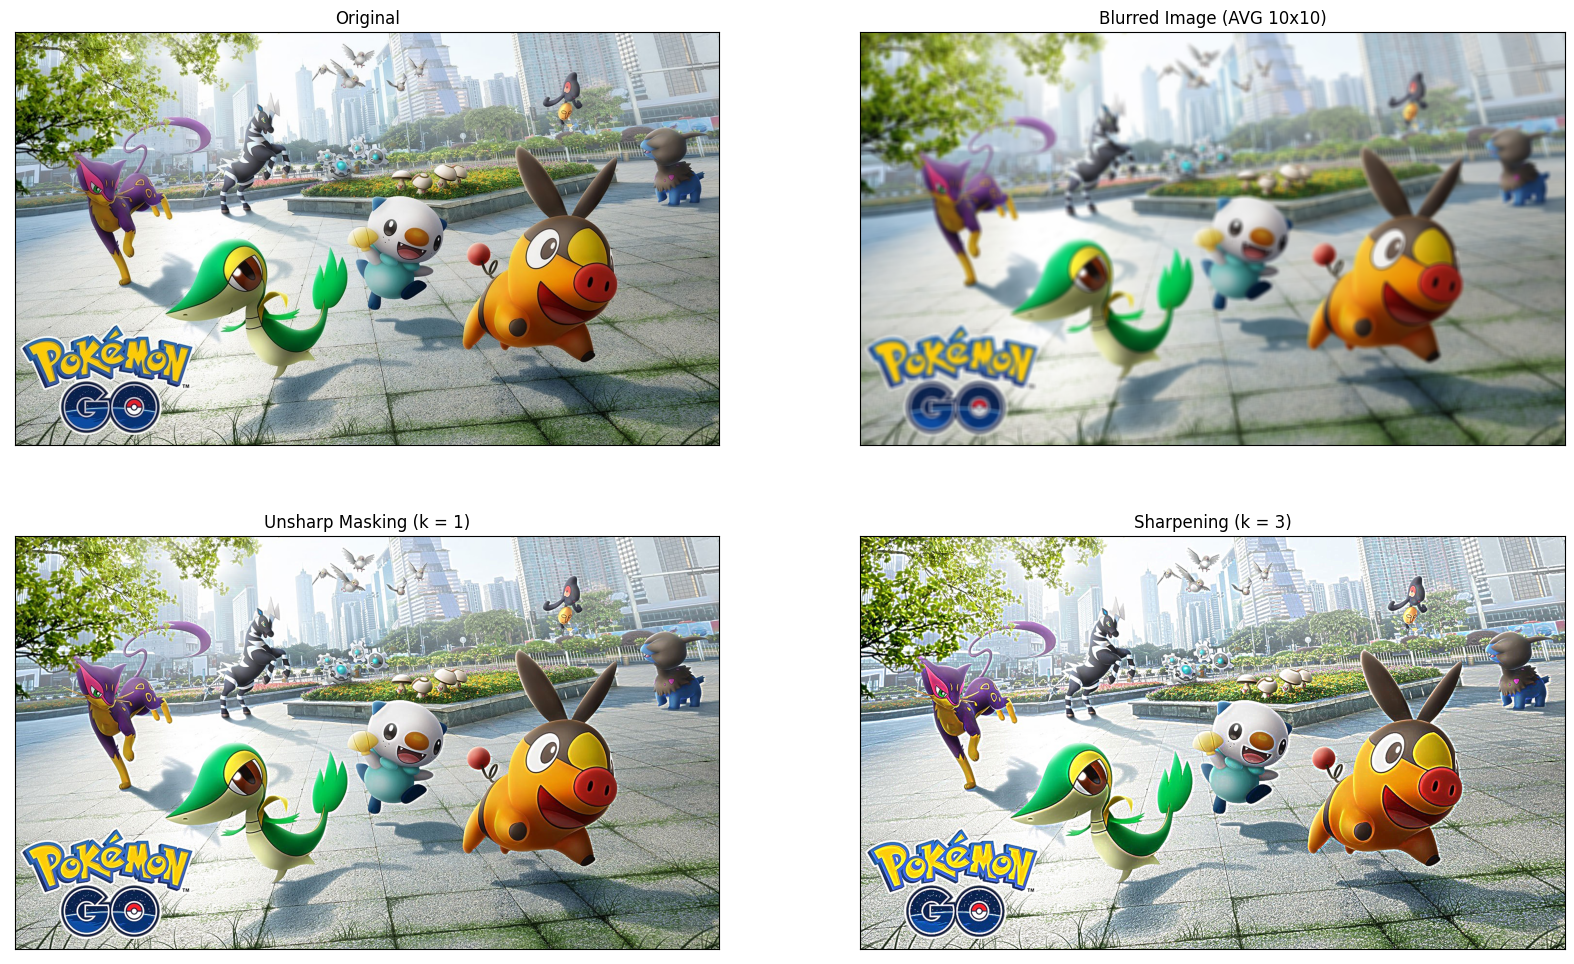

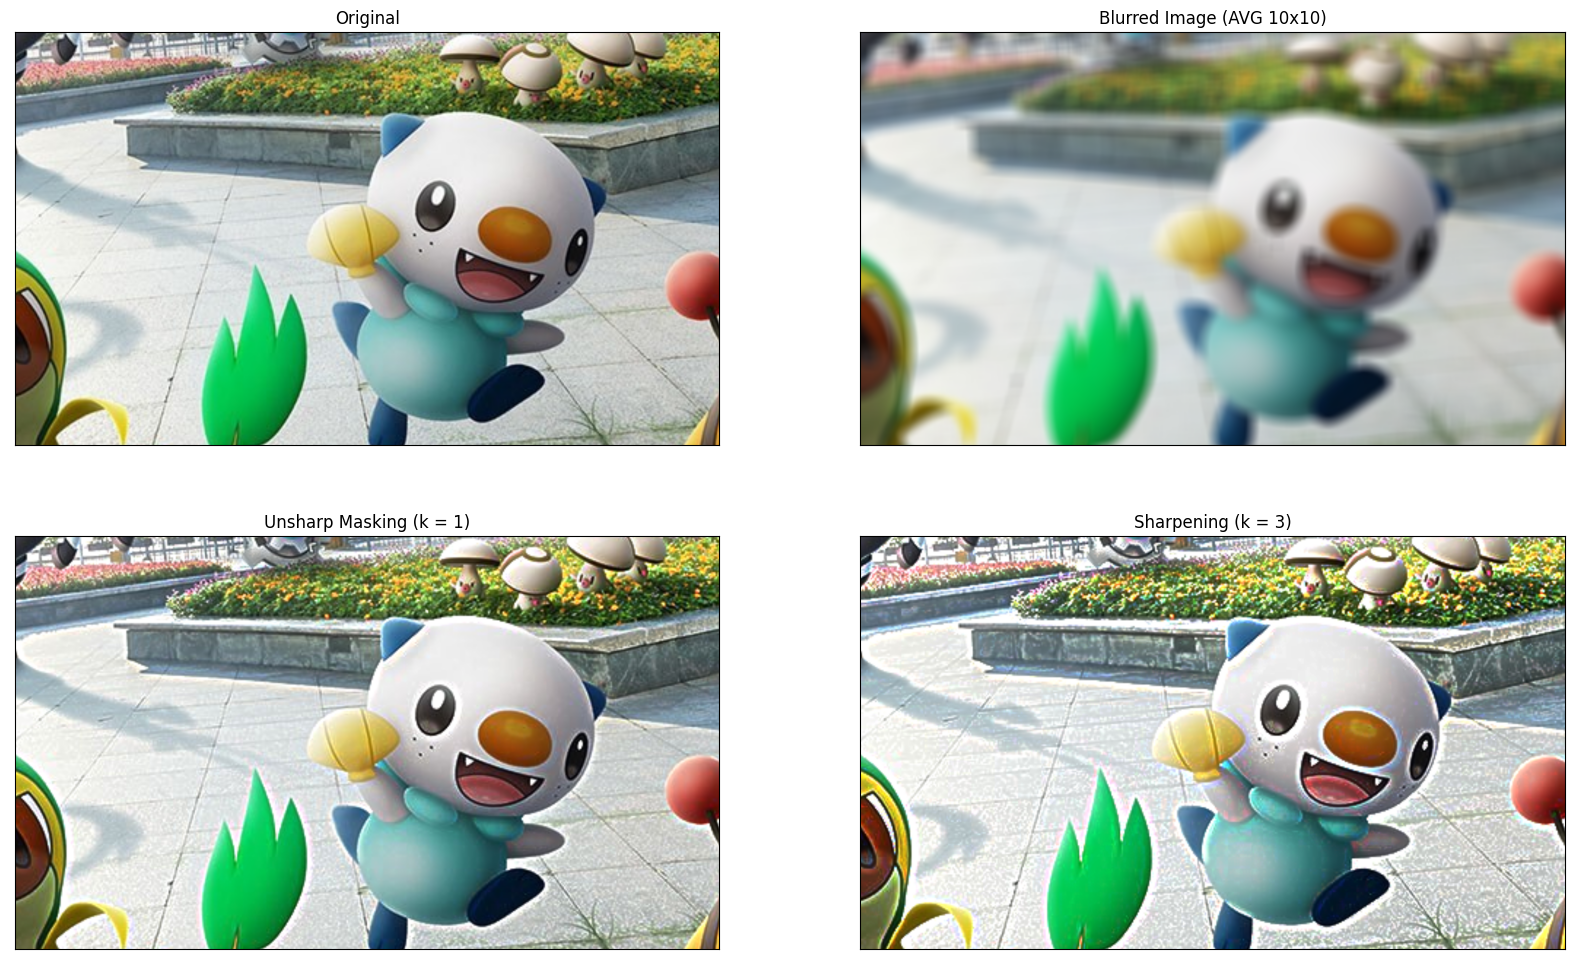

In [5]:
imgArr = [img, averaging(img, 10), unsharpAndSharp(img, 10, 1), unsharpAndSharp(img, 10, 3)]
zoomImgArr = [zoom_at(img, 3) for img in imgArr]
titleArr = ['Original', 'Blurred Image (AVG 10x10)', 'Unsharp Masking (k = 1)', 'Sharpening (k = 3)']
cmapArr = [None, None, None, None]

plt.figure(figsize=(20, 12))
showImage(imgArr, titleArr, 2, 2, cmapArr)
plt.close()

plt.figure(figsize=(20, 12))
showImage(zoomImgArr, titleArr, 2, 2, cmapArr)
plt.close()